In [ ]:
# myDate = pd.to_datetime(dfdate)
# df.interpolate(method = 'time/ values') --> 선형 보간법은 좋은 방법이 아니다. 
# df.duplicated(['K'])
# df.drop_duplicates(['K'])
# **value_counts(dropna=False)  nan까지 포함시켜서 출력
# bins=[] 속성 : 구간을 나누어준다. 

In [12]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler ## 특정 클래스만 가져올 때 사용
import matplotlib.pyplot as plt

In [8]:
df = pd.DataFrame(np.random.randn(5,3),
                 columns =['c1','c2','c3'])
df

,c1,c2,c3
0,-1.886406,-0.398564,1.168457
1,0.150201,1.465406,0.100692
2,1.008554,1.306371,-1.624917
3,-0.109203,0.271322,-1.060745
4,0.759595,0.087526,-1.262054


In [10]:
dfdate = ['07/03/2019','07/04/2019','07/05/2019','07/06/2019']
dfdate
myDate = pd.to_datetime(dfdate) # 문자 타입을 날짜 타입의 데이터로 변환해주는 함수!!
myDate

DatetimeIndex(['2019-07-03', '2019-07-04', '2019-07-05', '2019-07-06'], dtype='datetime64[ns]', freq=None)

In [17]:
times = Series([1, np.nan, np.nan, 20], index=myDate)
times

2019-07-03     1.0
2019-07-04     NaN
2019-07-05     NaN
2019-07-06    20.0
dtype: float64

In [18]:
# 보간법(interpolate) --> 추이를 반영하여 보간하는 방법
                        # 선형적으로 비례하게 보간해준다
ti=times.interpolate()   
ti  

2019-07-03     1.000000
2019-07-04     7.333333
2019-07-05    13.666667
2019-07-06    20.000000
dtype: float64

In [19]:
times.interpolate(method="time") 

2019-07-03     1.000000
2019-07-04     7.333333
2019-07-05    13.666667
2019-07-06    20.000000
dtype: float64

In [24]:
dfdate = ['07/03/2019','07/04/2019','07/05/2019','07/10/2019']
dfdate
myDate = pd.to_datetime(dfdate) # 문자 타입을 날짜 타입의 데이터로 변환해주는 함수!!
myDate

DatetimeIndex(['2019-07-03', '2019-07-04', '2019-07-05', '2019-07-10'], dtype='datetime64[ns]', freq=None)

In [25]:
times = Series([1, np.nan, np.nan, 20], index=myDate)
times

2019-07-03     1.0
2019-07-04     NaN
2019-07-05     NaN
2019-07-10    20.0
dtype: float64

In [27]:
times.interpolate(method="time")  

2019-07-03     1.000000
2019-07-04     3.714286
2019-07-05     6.428571
2019-07-10    20.000000
dtype: float64

In [30]:
df = DataFrame({'c1':[1,2,np.nan,np.nan,5],
        'c2':[6,8,10,np.nan,20]})
df

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,NaN,10.0
3,NaN,NaN
4,5.0,20.0


In [31]:
df.interpolate(method='values')

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,3.0,10.0
3,4.0,15.0
4,5.0,20.0


In [32]:
df.interpolate(method='values', limit=1)  # 변경할 nan의 갯수를 제한해준다

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,3.0,10.0
3,NaN,15.0
4,5.0,20.0


In [33]:
df.interpolate(method='values', limit=1, limit_direction='backward') # 변경할 nan의 방향을 설정한다

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,NaN,10.0
3,4.0,15.0
4,5.0,20.0


In [34]:
s =Series([1,2,3,4,np.nan])
s

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

In [35]:
s.replace(np.nan,10) # df.replace(np.nan, 변경할 값) 

0     1.0
1     2.0
2     3.0
3     4.0
4    10.0
dtype: float64

In [36]:
s.replace([1,2,3],[5,6,7]) # 대체 범위가 넓다. 리스트/ 딕셔너리 형태 모두 가능

0    5.0
1    6.0
2    7.0
3    4.0
4    NaN
dtype: float64

In [38]:
s.replace({1:10, np.nan:999}) #mapping rule 사용

0     10.0
1      2.0
2      3.0
3      4.0
4    999.0
dtype: float64

In [ ]:
# 중복된 값에 대한 처리 방법 --> duplicate(), duplicates()

In [40]:
df = pd.DataFrame({'K':['a','b','b','c','c'],
             'K2':['v','w','w','y','z'],
             'c':[1,2,3,4,5]})
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
K     5 non-null object
K2    5 non-null object
c     5 non-null int64
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [41]:
df.duplicated(['K']) 
# 중복이 됐는지 안됐는지 기준이 되는 값
# T/F로 return하는데, 첫 번째 중복되는 값은 False로 출력(이전 중복된 적 없기때문)

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [43]:
df.duplicated(['K','K2'])
# 두 가지 이상의 값을 결합하여 중복을 체크

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [47]:
df.duplicated(['K'])
df.duplicated(['K'], keep='first') # 중복이 발견되는 첫 번째 요소를 살려두겠다(default)
df.duplicated(['K'], keep='last') # 중복되는 마지막 값을 살려두겠다.
df.duplicated(['K'], keep=False) # 중복되는 모든 값을 TRUE로 반환

0    False
1     True
2     True
3     True
4     True
dtype: bool

In [50]:
df.drop_duplicates(['K'])  # 중복 값을 제거하는 함수 --> 나중에 중복으로 체크되는 값을 제거한다(default)
df.drop_duplicates(['K'],keep='first')
df.drop_duplicates(['K'],keep='last')
df.drop_duplicates(['K'],keep=False) # 중복되는 모든 값을 제거

,K,K2,c
0,a,v,1


In [ ]:
# 유일한 값을 확인하는 함수 : unique()
# 확인하려는 데이터의 건수를 조사하는 함수 : valuecounts()

In [51]:
df = pd.DataFrame({
    's':['f','m','m','f','m'],
    'd':['a','a','a','a',np.nan],
    'c':[1,1,3,4,4]})
df

,s,d,c
0,f,a,1
1,m,a,1
2,m,a,3
3,f,a,4
4,m,NaN,4


In [55]:
df['s'].unique() # 해당 열을 구성하는 요소에 대해 알고 싶을 때 사용
df['d'].unique() # unique()라는 함수는 Series에 포함 --> 대상이 Series이어야함

array(['a', nan], dtype=object)

In [58]:
df.values

array([['f', 'a', 1],
       ['m', 'a', 1],
       ['m', 'a', 3],
       ['f', 'a', 4],
       ['m', nan, 4]], dtype=object)

In [61]:
df['s'].value_counts()  # value_counts()도 Series에 사용되는 함수다

m    3
f    2
Name: s, dtype: int64

In [65]:
df['d'].value_counts() # value_counts() : nan은 출력되지 않는다

a    4
Name: d, dtype: int64

In [67]:
df['s'].value_counts(normalize=True) # value_counts(normalize=True) : 항목의 비율을 출력

m    0.6
f    0.4
Name: s, dtype: float64

In [70]:
df['c'].value_counts(sort=True) # 내림차순이 derault
df['c'].value_counts(sort=True, ascending=True)   

3    1
1    2
4    2
Name: c, dtype: int64

In [73]:
df['d'].value_counts(dropna=True) # value_counts(dropna=True) : default
df['d'].value_counts(dropna=False) 

a      4
NaN    1
Name: d, dtype: int64

In [ ]:
# 연속형 변수에 대해 구간으로 나누었을 때, 각 데이터가 몇 건씩 있는지를 확인
# ex) titanic에서 나이 구간별 생존률

In [74]:
df

,s,d,c
0,f,a,1
1,m,a,1
2,m,a,3
3,f,a,4
4,m,NaN,4


In [78]:
df['c'].value_counts(sort=False,bins=[0,1,2,3,4]) # bins의 구간 :  0초과 1이하, 1초과 2이하,...

(-0.001, 1.0]    2
(1.0, 2.0]       0
(2.0, 3.0]       1
(3.0, 4.0]       2
Name: c, dtype: int64

In [79]:
res = pd.cut(df['c'],bins=[0,1,2,3,4])

0    (0, 1]
1    (0, 1]
2    (2, 3]
3    (3, 4]
4    (3, 4]
Name: c, dtype: category
Categories (4, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4]]

In [81]:
res = pd.cut(df['c'],bins=[0,1,2,3,4])
pd.value_counts(res)

(3, 4]    2
(0, 1]    2
(2, 3]    1
(1, 2]    0
Name: c, dtype: int64

In [83]:
data = np.random.randint(20,size=(6,5)) #randint 는 정수 난수를 발생시킨다
data

array([[ 3, 18, 16,  8,  9],
       [18,  5,  8,  3, 17],
       [ 2,  5, 18,  2,  4],
       [15, 19,  1,  8,  9],
       [ 7, 10, 17, 19, 13],
       [13, 15,  9,  6,  9]])

In [93]:
from numpy import *
# 1. Numpy를 이용한 표준화

#np.mean(data)
print(mean(data)) # 전체 평균이 구해짐
print(data)
#표준화 : (각 열의 데이터 - 각 열의 평균) /  각 열의 표준편차 
# Z =(X[n]-mean()) / std()
print(mean(data,axis=0)) # 열 단위로 평균을 구한다.
print('='*50)
std_data = ( data-mean(data,axis=0) ) / std(data,axis=0) # 내부적으로 broadcasting되어 연산된다

10.2
[[ 3 18 16  8  9]
 [18  5  8  3 17]
 [ 2  5 18  2  4]
 [15 19  1  8  9]
 [ 7 10 17 19 13]
 [13 15  9  6  9]]
[ 9.66666667 12.         11.5         7.66666667 10.16666667]


In [94]:
std_data

array([[-1.10263569,  1.04978132,  0.74062996,  0.05997601, -0.29040893],
       [ 1.37829462, -1.22474487, -0.57604552, -0.8396642 ,  1.70096662],
       [-1.26803105, -1.22474487,  1.06979882, -1.01959224, -1.53501866],
       [ 0.88210855,  1.22474487, -1.72813656,  0.05997601, -0.29040893],
       [-0.44105428, -0.34992711,  0.90521439,  2.03918449,  0.70527884],
       [ 0.55131785,  0.52489066, -0.41146109, -0.29988007, -0.29040893]])

In [95]:
mean(std_data, axis=0)

array([ 1.48029737e-16, -3.70074342e-17, -9.25185854e-18, -8.32667268e-17,
        1.66533454e-16])

In [96]:
std(std_data,axis=0)

array([1., 1., 1., 1., 1.])

In [98]:
import scipy.stats as ss
# 2. scipy를 이용한 표준화
ss.zscore(data)

array([[-1.10263569,  1.04978132,  0.74062996,  0.05997601, -0.29040893],
       [ 1.37829462, -1.22474487, -0.57604552, -0.8396642 ,  1.70096662],
       [-1.26803105, -1.22474487,  1.06979882, -1.01959224, -1.53501866],
       [ 0.88210855,  1.22474487, -1.72813656,  0.05997601, -0.29040893],
       [-0.44105428, -0.34992711,  0.90521439,  2.03918449,  0.70527884],
       [ 0.55131785,  0.52489066, -0.41146109, -0.29988007, -0.29040893]])

In [99]:
from sklearn.preprocessing import StandardScaler
# 3. scikit-learn을 이용한 표준화
std_data = StandardScaler().fit_transform(data) #괄호를 만드는게 객체를 생성하는 것
std_data

array([[-1.10263569,  1.04978132,  0.74062996,  0.05997601, -0.29040893],
       [ 1.37829462, -1.22474487, -0.57604552, -0.8396642 ,  1.70096662],
       [-1.26803105, -1.22474487,  1.06979882, -1.01959224, -1.53501866],
       [ 0.88210855,  1.22474487, -1.72813656,  0.05997601, -0.29040893],
       [-0.44105428, -0.34992711,  0.90521439,  2.03918449,  0.70527884],
       [ 0.55131785,  0.52489066, -0.41146109, -0.29988007, -0.29040893]])

In [ ]:
# 이상치, 특이값이 포함되어있는 데이터의 표준화
# 평균, 표준편차는 이상치에 민감하다(영향을 많이 받는다.)
# 중앙값(Q2), IQR(Q3 - Q1) --> 표준편차 대신 사용하기도 한다, Max(Q4)
# robustscaler = X-median() / IQR (이상치에 영향을 많이 안 받는 표준화 방법!!)

10.147389546015

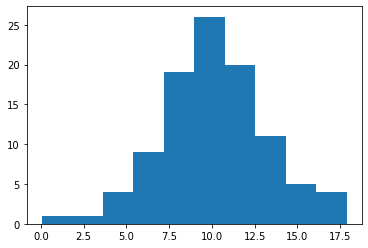

In [108]:
np.random.seed(73)  # 난수 발생시, 비교를 위해 seed를 주어 기준을 생성 # 난수로 42가 좋다고함(이유는모름)
mu, sigma = 10, 3
x = mu +  sigma* random.randn(100)
x
import matplotlib.pyplot as plt
plt.hist(x)
mean(x)

In [109]:
std(x)

3.014695610662603

In [111]:
x[95:100] = 100
x

array([1.17304392e+01, 1.63933264e+01, 1.73206590e+01, 1.07899806e+01,
       5.51163806e+00, 9.88979408e+00, 1.12920874e+01, 5.41157701e+00,
       7.80922097e+00, 1.31539457e+01, 1.48593780e+01, 5.18495989e+00,
       1.09930286e+01, 9.36714293e+00, 1.08945301e+01, 6.56177945e+00,
       1.17260861e+01, 8.90828010e+00, 1.01091976e+01, 8.43830804e+00,
       9.95270700e+00, 9.86247581e+00, 8.14476643e+00, 7.54049167e+00,
       1.15294257e+01, 1.31518183e+01, 1.04350957e+01, 8.97743181e+00,
       1.37323753e+01, 1.49674550e+01, 9.18100947e+00, 8.92022193e+00,
       7.33842885e-02, 1.31550968e+01, 9.32104691e+00, 8.01247213e+00,
       1.27391756e+01, 1.27635065e+01, 1.27163572e+01, 8.54749669e+00,
       7.85535142e+00, 1.05471619e+01, 1.17301502e+01, 5.30930238e+00,
       1.56590461e+01, 6.80288206e+00, 1.03384932e+01, 8.23193967e+00,
       1.19328003e+01, 1.09154191e+01, 1.18521557e+01, 1.32972652e+01,
       8.69230361e+00, 1.11955065e+01, 1.00184890e+01, 4.93669823e+00,
      

(array([48., 47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([7.33842885e-02, 1.00660459e+01, 2.00587074e+01, 3.00513690e+01,
        4.00440306e+01, 5.00366921e+01, 6.00293537e+01, 7.00220153e+01,
        8.00146769e+01, 9.00073384e+01, 1.00000000e+02]),
 <a list of 10 Patch objects>)

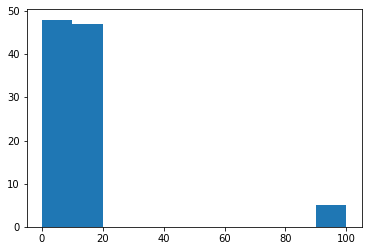

In [112]:
plt.hist(x)

(array([ 1.,  1.,  7.,  8., 29., 25., 14.,  6.,  4.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 <a list of 50 Patch objects>)

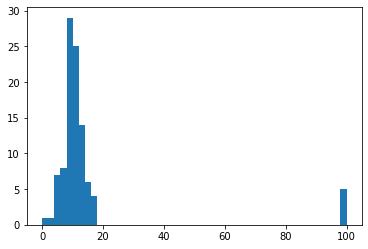

In [116]:
plt.hist(x,bins=np.arange(0,101,2))

(100, 1)
(100, 1)


(array([8., 0., 0., 0., 5., 0., 0., 0., 0.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

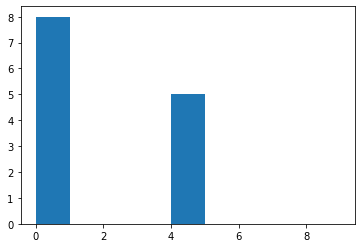

In [127]:
print(np.shape(x))
x=x.reshape(-1,1) #-1 : 행은 알아서 처리하라.data100개 2차원으로 만들면 --> (1,100)이 됨 
                  # deep-learning 에서는 None으로 처리함
print(np.shape(x))
std_x = StandardScaler().fit_transform(x)
std_x
plt.hist(std_x,bins=np.arange(0,10,1))


In [125]:
mean(std_x)

5.329070518200751e-17

In [126]:
std(std_x)

1.0

(array([ 0.,  1.,  9., 45., 32.,  8.,  0.,  0.,  0.]),
 array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
        -2.00000000e-01, -2.22044605e-16,  2.00000000e-01,  4.00000000e-01,
         6.00000000e-01,  8.00000000e-01]),
 <a list of 9 Patch objects>)

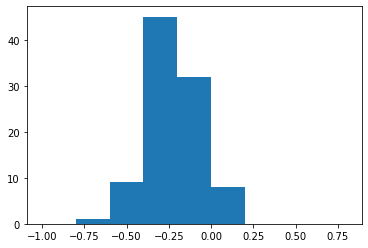

In [134]:
std_o = std_x[std_x < 4] # 괄호 안 조건에 맞는 데이터만 출력
plt.hist(std_o, bins = np.arange(-1,1,0.2))

In [138]:
mean(x) # 이상치 때문에 14.xxx
median(x) # 이상치의 영향을 많이 안받아서 10. xxx
Q1 = percentile(x,25) # x의 25% 지점의 수 출력 --> 8.xxx
Q3 = percentile(x,75) # ---> 12.xxx
IQR = Q3-Q1

12.534014070784306

4.829204078863935

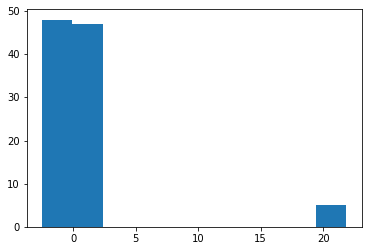

In [143]:
rbs_x = RobustScaler().fit_transform(x)
rbs_x # 기존 데이터를 로버스트 스케일링한 값 --> 각 값에서 중위수로 나누고 IQR을 빼줌 
plt.hist(rbs_x)
median(rbs_x) # 따라서 중위수는 0
std(rbs_x)

In [144]:
rbs_o = rbs_x[rbs_x<5]
plt.hist(rbs_o, bins=np.arange(-3,3))

In [ ]:
# 정규화 : (각 열의 요소값 - 각 열의 최소값) / (각 열의 최대값 - 각 열의 최소값) --> 요소값이 최대값일 때 1 최소값일 때 0이 된다
# 0~1 사이의 범위 (일반적으로 딥러닝에서는 0-1 사이 값으로 표현)
# 연습 문제 : 관심 회사의 주식 데이터를 다운받아(1개월치) 표준화 정규화  --> 함수쓰지말고 구현해보기 

In [153]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
x = np.array([[9,-9,2],
         [5,0,1],
         [1,10,4],
         [4,7,-2]])
x
x.min()

-9

In [149]:
x.min(axis=0) #[1,-9,-2]
x.max(axis=0) #[9,10,4]

array([ 9, 10,  4])

In [148]:
x.min(axis=1)

array([-9,  0,  1, -2])

In [151]:
(x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))

array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.47368421, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.84210526, 0.        ]])

In [154]:
x_minmax = MinMaxScaler().fit_transform(x)
x_minmax

array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.47368421, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.84210526, 0.        ]])

In [157]:
from sklearn.preprocessing import minmax_scale

minmax_scale(x,axis=0)

In [160]:
#연습문제2 : 이항변수화 변환(타이타닉)
#연속형 변수값 -> 0또는 1 (2가지)
from sklearn.preprocessing import Binarizer # 이항 변수화 시키는 함수

In [161]:
x =np.array([[5,-3,2],
            [7,-1,0],
            [0,9,5]])

In [164]:
# 3을 기준 (threshold)
Binarizer().fit(x)

In [169]:
bnr = Binarizer(2).fit(x) # 2 이하는 0, 2초과는 1로 이진화 시켜줌
bnr.transform(x)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 1]])